# Data munging with pandas

_Adapted from original materials by [manishamde](https://github.com/manishamde)._

Data munging or data wrangling is loosely the process of manually converting or mapping data from one 
"raw" form into another format that allows for more convenient consumption of the data with the help of 
semi-automated tools.

Data munging is basically the hip term for cleaning up a messy data set.

Data munging involves common operations such as: 
 - Indexing
 - Renaming
 - Handling missing values
 - map(), apply(), applymap()
 - New Columns = f(Existing Columns)
 - Basic stats
 - Merge, join
 - Plots

In [2]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We'll try the above operations on a very simple dataframe

In [3]:
def defdf():
    df = pd.DataFrame({'int_col' : [1, 2, 6, 8, -1], 
                   'float_col' : [0.1, 0.2, 0.2, 10.1, None], 
                   'str_col' : ['a', 'b', None, 'c', 'a']})
    return df

df = defdf()
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


## Indexing

### Selecting a subset of columns
 * Select only the float and string columns of the dataframe

In [5]:
df[['float_col', 'str_col']]

,float_col,str_col
0,0.1,a
1,0.2,b
2,0.2,None
3,10.1,c
4,NaN,a


### Conditional indexing
 * Using boolean indexing, select the rows of the dataframe for which float column is larger than 0.15
 * Select the rows for which float column is larger than 0.1 and integer column is larger than 2. Change 'and' by 'or' 
 * Select the rows for which string column is not 'a'

In [6]:
df[df['float_col'] > 0.15]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


In [10]:
df[df['int_col'] > 2]  

,float_col,int_col,str_col
2,0.2,6,None
3,10.1,8,c


In [12]:
df[(df['float_col'] > 0.15) & (df['int_col'] > 2) ]

,float_col,int_col,str_col
2,0.2,6,None
3,10.1,8,c


In [13]:
df[(df['float_col'] > 0.15) | (df['int_col'] > 2) ]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


In [14]:
df[df['str_col'] != 'a']

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


## Renaming

 * Use the rename method to rename all three columns
 * Set inplace=True for the changes to affect the existing dataframe

In [23]:
 df.rename(columns={"float_col": "F", "int_col" : "I", "str_col" : "S"},inplace=True)

In [24]:
df

,F,I,S
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


## Handling missing values

### Drop missing values

 * Use dropna to drop all rows with missing data (NaN). From now on, perform the rest of the exercises on this modified dataframe.

In [32]:
edf = df.dropna()

In [33]:
edf

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
3,10.1,8,c


### Fill missing values
 * Use fillna to fill missing data. Fill float column with median of column and string column with a character of your choosing. Use inplace to alter the value in the original dataframe.

In [4]:
df['float_col'] = df['float_col'].fillna(df['float_col'].median())

In [5]:
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,0.2,-1,a


In [6]:
df['int_col'] = df['int_col'].fillna(df['int_col'].median())

In [7]:
df['str_col'] = df['str_col'].fillna('a')

## Vectorized operations: map, apply
### map
The map operation maps the values of a series iterating over each element
 * Use map to generate a series that equals each element of integer column squared

In [8]:
df['int_col'].map(lambda x: x*x )

0     1
1     4
2    36
3    64
4     1
Name: int_col, dtype: int64

In [13]:
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,a
3,10.1,8,c
4,NaN,-1,a


### apply
The apply operation applies a function along any axis of the dataframe. 
 - axis=0: apply function to each column
 - axis=1: apply function to each row
Depending on the return type of the function passed to apply(), the result will either be of lower dimension or the same dimension.


 * Use apply on columns to compute the square root of the float and integer columns
 * Use apply on rows to compute the cumulative sum by rows of the elements of the float and integer columns

In [15]:
from numpy import sqrt, cumsum
def sqrt1(row):
    return sqrt(row['int_col']) if row['int_col'] > 0 else 0 

def sqrt2(row):
    return sqrt(row['float_col']) if row['float_col'] > 0 else 0 

def sqrtun(row):
    return (sqrt(row['int_col']) if row['int_col'] > 0 else 0, sqrt(row['float_col']) if row['float_col'] > 0 else 0) 

def ssum(col):
    return (sqrt(col) if col > 0 else 0) 


print(df[['float_col','int_col']].apply(sqrt,axis=0))
print(df[['float_col','int_col']].apply(cumsum,axis=1))


#print(df.apply(sqrt2,axis=1))


   float_col   int_col
0   0.316228  1.000000
1   0.447214  1.414214
2   0.447214  2.449490
3   3.178050  2.828427
4   0.447214       NaN
   float_col  int_col
0        0.1      1.1
1        0.2      2.2
2        0.2      6.2
3       10.1     18.1
4        0.2     -0.8


### applymap
The applymap operation applies a function to a dataframe that is intended to operate elementwise

 * Use applymap to transform the dataframe in the following manner: duplicate elements of type string ('z' -> 'zz') and compute the exponential of numerical elements. Hint: define first the function fn that needs to be applied.

In [20]:
def fn(x):
    if type(x) is str:
        return x*2
    else:
        return x*x
    


print(df.applymap(fn))

   float_col  int_col str_col
0       0.01        1      aa
1       0.04        4      bb
2       0.04       36      aa
3     102.01       64      cc
4       0.04        1      aa


## New Columns = f(Existing Columns)

Generating new columns from existing columns in a data frame is an integral part of the data mungling workflow. 

### multiple columns as a function of a single column

 * Use map in combination with zip to construct two new columns being the square and third power of the integer column. [Help](http://stackoverflow.com/questions/12356501/pandas-create-two-new-columns-in-a-dataframe-with-values-calculated-from-a-pre)

In [23]:
def calculate(x):
    return x**2, x**3
   

df['square'], df['cube'] = zip ( *df['int_col'].map(calculate) )

In [24]:
df

,float_col,int_col,str_col,square,cube
0,0.1,1,a,1,1
1,0.2,2,b,4,8
2,0.2,6,a,36,216
3,10.1,8,c,64,512
4,0.2,-1,a,1,-1


### single column as a function of multiple columns

 * Use apply to construct a new column sum of the float and integer columns. [Help](http://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe?lq=1)
 * Use apply to construct a new column composed of the concatenation of the string column and the integer column cast to string

In [27]:
def f1(x):    
    return x['int_col'] + x['float_col']  
def f2(x):    
    return x['str_col'] + str(x['int_col'])  


df['sum_int_float_col'] = df.apply(f1, axis=1) 
df['sum_int_str_col'] = df.apply(f2, axis=1) 


In [28]:
df

,float_col,int_col,str_col,square,cube,sum_int_float_col,sum_int_str_col
0,0.1,1,a,1,1,1.1,a1
1,0.2,2,b,4,8,2.2,b2
2,0.2,6,a,36,216,6.2,a6
3,10.1,8,c,64,512,18.1,c8
4,0.2,-1,a,1,-1,-0.8,a-1


### multiple columns as a function of multiple columns

 * Use apply and a function that returns a Series to construct two new columns being the square root of the float and integer columns. [Help](http://stackoverflow.com/questions/10751127/returning-multiple-values-from-pandas-apply-on-a-dataframe)

In [45]:
def f(x):
    #return {'sq_int': sqrt(abs(x['int_col'])), 'sq_float': sqrt(abs(x['float_col']))}
    return pd.Series({'sq_int': sqrt(abs(x['int_col'])), 'sq_float': sqrt(abs(x['float_col']))})
    
    #return {'sq_int': x['int_col'], 'sq_float': x['float_col']}
ndf = pd.DataFrame(df.apply(f,axis=1))

In [46]:
ndf

,sq_float,sq_int
0,0.316228,1.000000
1,0.447214,1.414214
2,0.447214,2.449490
3,3.178050,2.828427
4,0.447214,1.000000


In [49]:
pd.concat([ndf, df], axis=1)

,sq_float,sq_int,float_col,int_col,str_col,square,cube,sum_int_float_col,sum_int_str_col,sq_int,sq_float
0,0.316228,1.000000,0.1,1,a,1,1,1.1,a1,sq_float,sq_int
1,0.447214,1.414214,0.2,2,b,4,8,2.2,b2,sq_float,sq_int
2,0.447214,2.449490,0.2,6,a,36,216,6.2,a6,sq_float,sq_int
3,3.178050,2.828427,10.1,8,c,64,512,18.1,c8,sq_float,sq_int
4,0.447214,1.000000,0.2,-1,a,1,-1,-0.8,a-1,sq_float,sq_int


## Basic stats

### describe

 * Use describe to gather information on the distribution of the float and integer columns.
 * Use boxplot for a visual representation of the same information

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
float_col            5 non-null float64
int_col              5 non-null int64
str_col              5 non-null object
square               5 non-null int64
cube                 5 non-null int64
sum_int_float_col    5 non-null float64
sum_int_str_col      5 non-null object
sq_int               5 non-null object
sq_float             5 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 440.0+ bytes


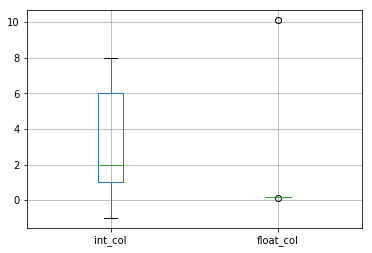

In [58]:
%matplotlib inline
df[['int_col','float_col']].boxplot()



## Merge and Join

Pandas supports database-like joins which makes it easy to link data frames.

 * Perform inner, outer, left and right joins of the dataframe with the second dataframe defined below

In [60]:
df2 = pd.DataFrame({'str_col_2' : ['a','b'], 'int_col_2' : [1, 2]})
df2

,int_col_2,str_col_2
0,1,a
1,2,b


In [61]:
df.merge(df2,how='inner', left_on=['str_col','int_col'], right_on=['str_col_2','int_col_2'])

,float_col,int_col,str_col,square,cube,sum_int_float_col,sum_int_str_col,sq_int,sq_float,int_col_2,str_col_2
0,0.1,1,a,1,1,1.1,a1,sq_float,sq_int,1,a
1,0.2,2,b,4,8,2.2,b2,sq_float,sq_int,2,b


## Plots

Pandas is equiped with straightforward wrappers for quick plotting of data

 * Use plot to visualize the values columns of the dataframe defined below
 * Use hist to visualize the distribution of the data in the form of a histogram

In [ ]:
plot_df = pd.DataFrame(np.random.randn(1000,2),columns=['x','y'])
plot_df['y'] = plot_df['y'].map(lambda x : x + 1)
plot_df.head()